NOTE: `root_path` is hard-coded below. Update it as necessary to point to the root directory for `heterogeneous_botl`.

In [1]:
import os
import torch
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rc("figure", facecolor="white")
font = {"family": "Times New Roman", "weight": "normal"}
matplotlib.rc("font", **font)
SMALL_SIZE = 14
MEDIUM_SIZE = 16
TITLE_SIZE = 18
title_dict = {"titlecolor": "black", "titlesize": TITLE_SIZE}
axis_dict = {"labelcolor": "black", "labelsize": SMALL_SIZE}

plt.rc("axes", **title_dict)  # fontsize of the axes title
plt.rc("axes", **axis_dict)  # fontsize of the x and y labels
plt.rc("xtick", **axis_dict)  # fontsize of the tick labels
plt.rc("ytick", **axis_dict)  # fontsize of the tick labels
plt.rc("legend", fontsize=MEDIUM_SIZE)  # legend fontsize
plt.rc("figure", titlesize=TITLE_SIZE)  # fontsize of the figure title

results = {
    "hartmann": {},
    "ranger": {},
    "rpart": {},
}

root_path = os.path.join(os.path.expanduser("~"), "heterogeneous_botl/")
results_dir = os.path.join(root_path, "results")

In [2]:
methods = {
    "random": {"color": "#17becf", "linestyle": "dashdot"},
    "single-task": {"color": "#ff7f0e", "linestyle": "solid"},
    "het_mtgp": {"color": "#2ca02c", "linestyle": (5, (10, 3))},
    "imputed_mtgp": {"color": "#d62728", "linestyle": "dotted"},
    "common_mtgp": {"color": "#9467bd", "linestyle": (0, (3, 1, 1, 1))},
    "learned_imputed_mtgp": {"color": "#1f77b4", "linestyle": "dashed"},
}
PROBLEM_NAME_MAPPING = {
    "hartmann": "6D Negative Hartmann",
    "ranger": "11D Ranger",
    "rpart": "6D Rpart",
}
METHOD_NAME_MAPPING = {
    "random": "Random",
    "single-task": "Vanilla BO",
    "het_mtgp": "MTGP with conditional kernels",
    "imputed_mtgp": "Imputed MTGP",
    "common_mtgp": "MTGP on common parameters",
    "learned_imputed_mtgp": "Learned Imputed MTGP",
}

In [3]:
for problem, res_dict in results.items():
    for method in methods:
        filename = os.path.join(results_dir, f"{method}_{problem}_{30}_source_{100}_replications.pkl")
        res_dict[method] = torch.load(filename)

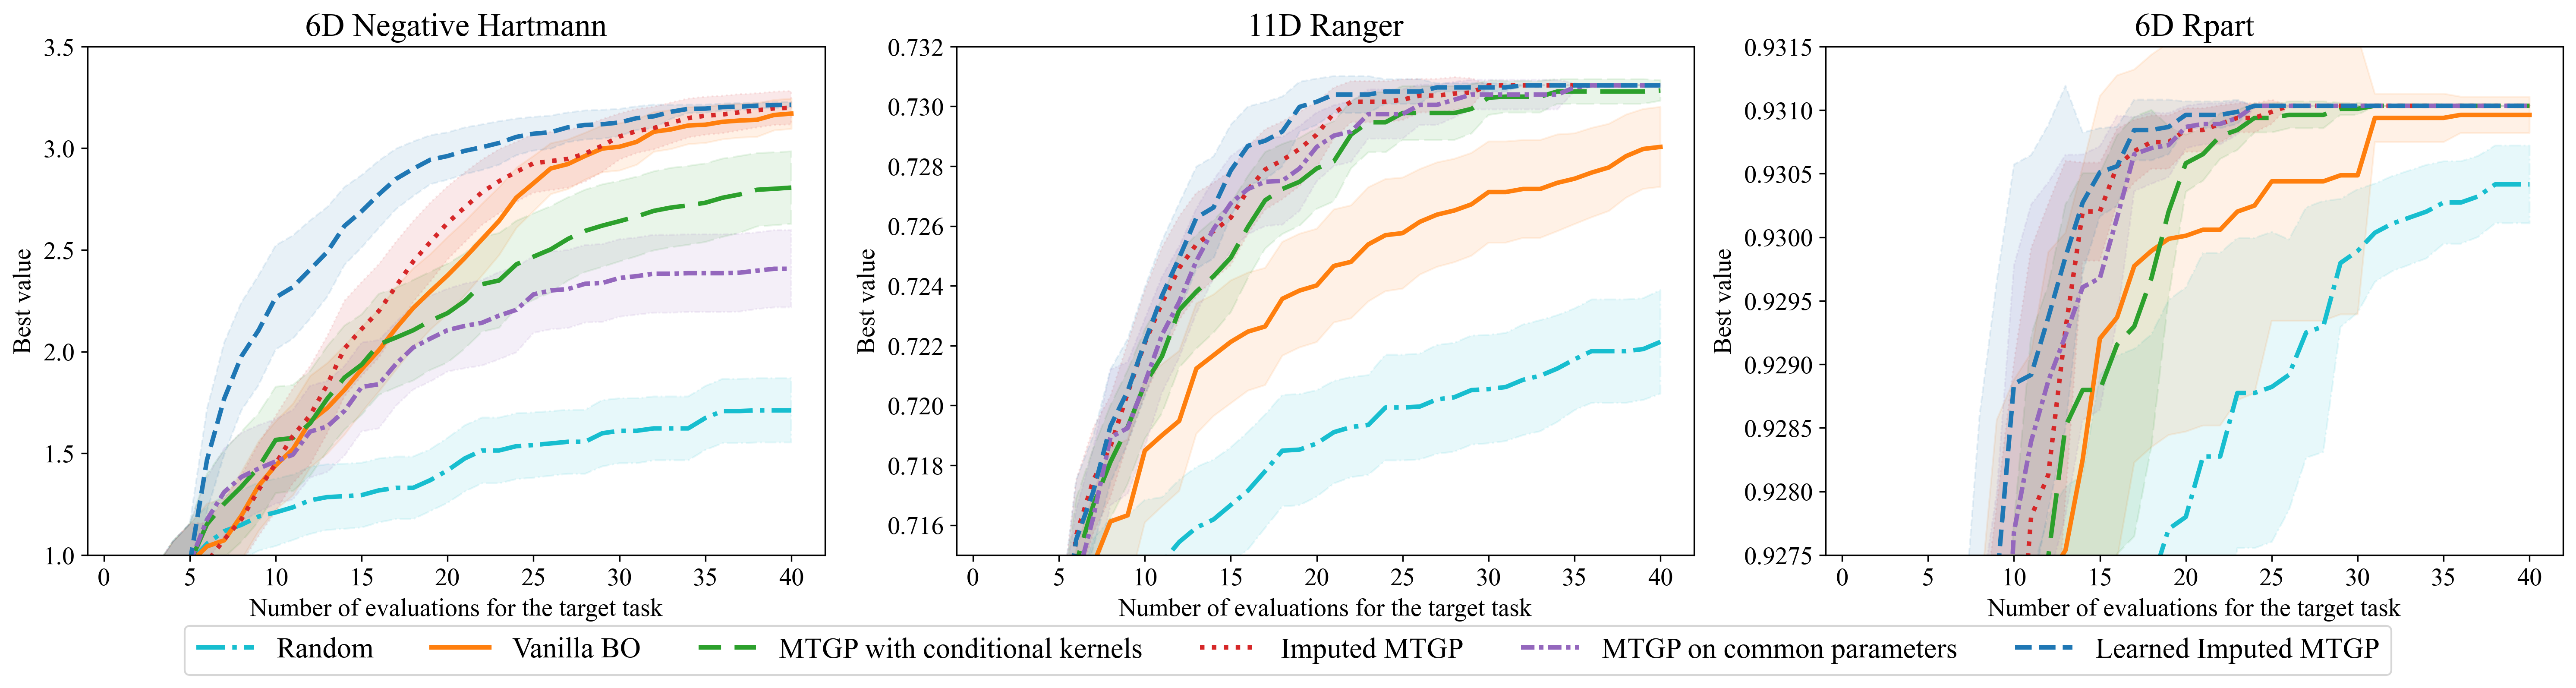

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=300, layout="tight")

bounds = {
    "hartmann": (1.0, 3.5),
    "ranger": (0.715, 0.732),
    "rpart": (0.9275, 0.9315),
}

max_val = {
    "hartmann": 3.32237,
    "ranger": 0.7307,
    "rpart": 0.9310,
}

for i, problem in enumerate(results):
    ax = axes[i]
    for method, res in results[problem].items():
        all_ys = torch.stack([r["running_optimum"] for r in res])
        count = all_ys.shape[0]
        mean = all_ys.mean(dim=0)
        sem = 2 * all_ys.std(dim=0) / torch.sqrt(torch.tensor(count))
        x = list(range(1, len(mean) + 1))
        ax.plot(x, mean, label=METHOD_NAME_MAPPING[method], **methods[method], linewidth=2.5)
        ax.fill_between(x, mean - sem, mean + sem, alpha=0.1, **methods[method])
        ax.set_title(PROBLEM_NAME_MAPPING[problem])
        ax.set_ylim(bounds[problem])
        ax.set_xlabel("Number of evaluations for the target task")
        ax.set_ylabel("Best value")

fig.tight_layout()
plt.legend(
    bbox_to_anchor=(0.5, -0.075),
    loc="lower center",
    ncol=6,
    bbox_transform=plt.gcf().transFigure,
    fontsize=MEDIUM_SIZE,
)
plt.show()
fig.savefig(os.path.join(results_dir, "botl_results.pdf"), bbox_inches="tight")